# ML zoomcamp HW2

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-21 13:01:42--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.1s    

2023-09-21 13:01:43 (9.63 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
df = pd.read_csv('housing.csv')

In [23]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [24]:
df.median_house_value.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

/Users/quinn/.pyenv/versions/3.11.4/envs/practice/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/quinn/.pyenv/versions/3.11.4/envs/practice/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

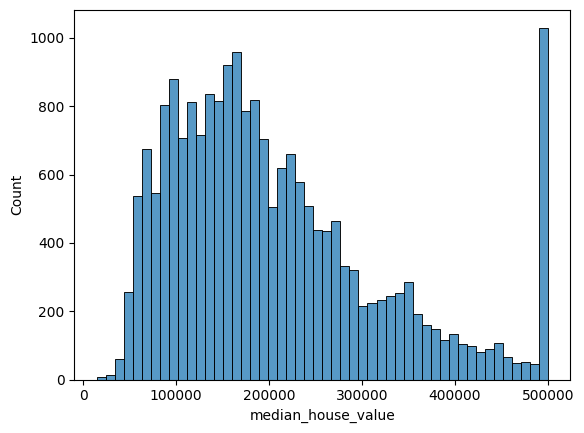

In [25]:
sns.histplot(df.median_house_value, bins=50)

In [28]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [26]:
df_prep = df[(df["ocean_proximity"] == '<1H OCEAN') | (df["ocean_proximity"] == 'INLAND')]
df_prep["ocean_proximity"].unique()

array(['<1H OCEAN', 'INLAND'], dtype=object)

In [27]:
columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
           'population', 'households', 'median_income', 'median_house_value']

In [33]:
df_prep.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [37]:
df_prep = df_prep[columns]

In [38]:
df_prep.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

# Question 1

In [36]:
df_prep.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

total_bedrooms has 157 missing values

# Question 2

In [41]:
df_prep["population"].median()

1195.0

Median is 1195

## Prepare and split the dataset

In [42]:
len(df_prep)

15687

In [43]:
n = len(df_prep)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [50]:
n

15687

In [51]:
n == (n_val+n_test+n_train)

True

In [49]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 15684, 15685, 15686])

In [53]:
np.random.seed(42)
np.random.shuffle(idx)

In [54]:
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [55]:
df_train = df_prep.iloc[idx[:n_train]]
df_val = df_prep.iloc[idx[n_train:n_train+n_val]]
df_test = df_prep.iloc[idx[n_train+n_val:]]

In [56]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [57]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [58]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [59]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [60]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [61]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Question 3

In [69]:
def prepare_X_zeros(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [89]:
def prepare_X_mean(df):
    # Note if we want to use the mean from the training data.
    df_num = df
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [63]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [64]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [65]:
df_train.isnull().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        94
population             0
households             0
median_income          0
dtype: int64

In [66]:
# Filling na with 0's
X_train = df_train.fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

/Users/quinn/.pyenv/versions/3.11.4/envs/practice/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/quinn/.pyenv/versions/3.11.4/envs/practice/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/quinn/.pyenv/versions/3.11.4/envs/practice/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/quinn/.pyenv/versions/3.11.4/envs/practice/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWar

<Axes: ylabel='Count'>

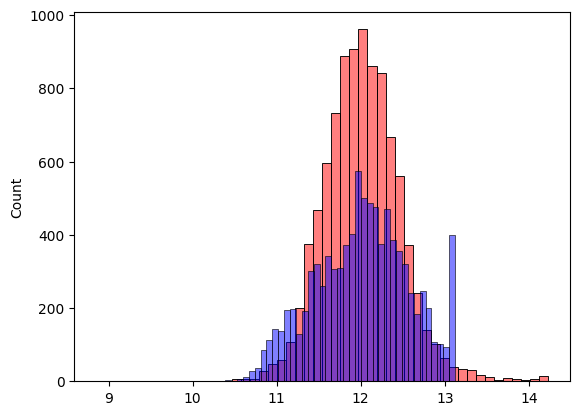

In [67]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [68]:
rmse(y_train, y_pred)

0.3402719715829534

In [88]:
# predicting with validation set
X_val = prepare_X_zeros(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.34

Lets check out filling with mean 

In [81]:
# We know total bedrooms has missing data. Lets fill this with the mean.

# X_train = prepare_X_mean(df_train)
train_bedroom_mean = df_train["total_bedrooms"].mean()
X_train = df_train.fillna(train_bedroom_mean)

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

rmse(y_train, y_pred)

0.34003008222642606

In [87]:
# predicting with validation set with mean fill
X_val = df_val.fillna(train_bedroom_mean)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.34

Using mean or fill zeros seems equally good.

# Question 4

In [75]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [90]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X_zeros(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X_zeros(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, "RMSE", round(score,2))

0 -9.763249478052225 RMSE 0.34
1e-06 -9.763228830851833 RMSE 0.34
0.0001 -9.761185235851151 RMSE 0.34
0.001 -9.742646249818254 RMSE 0.34
0.01 -9.561056192964566 RMSE 0.34
0.1 -8.058889769570351 RMSE 0.34
1 -3.1331542783778734 RMSE 0.34
5 -0.8410867974609664 RMSE 0.35
10 -0.4381172316101039 RMSE 0.35


Seems like .000001

# Question 5

In [92]:
def seed_test(x):
    n = len(df_prep)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(x)
    np.random.shuffle(idx)
    
    df_train = df_prep.iloc[idx[:n_train]]
    df_val = df_prep.iloc[idx[n_train:n_train+n_val]]
    df_test = df_prep.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    return df_train, df_val, df_test

In [100]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for seed in seeds:
    df_train, df_val, df_test = seed_test(seed)

    # Define y
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    # Remove from datasets
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    # Filling na with 0's
    X_train = df_train.fillna(0).values

    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_train.dot(w)
    print(f"Training RMSE {round(rmse(y_train, y_pred), 2)}")

    # predicting with validation set
    X_val = prepare_X_zeros(df_val)
    y_pred = w0 + X_val.dot(w)
    validation_score = round(rmse(y_val, y_pred), 2)
    scores.append(validation_score)
    print(f"Validation RMSE {validation_score}")
print("Standard Deviation", round(pd.Series(scores).std(), 3))


Training RMSE 0.33
Validation RMSE 0.34
Training RMSE 0.34
Validation RMSE 0.34
Training RMSE 0.34
Validation RMSE 0.34
Training RMSE 0.34
Validation RMSE 0.33
Training RMSE 0.33
Validation RMSE 0.34
Training RMSE 0.34
Validation RMSE 0.34
Training RMSE 0.34
Validation RMSE 0.34
Training RMSE 0.33
Validation RMSE 0.35
Training RMSE 0.33
Validation RMSE 0.35
Training RMSE 0.34
Validation RMSE 0.33
Standard Deviation 0.007


Closest answer is .005

# Question 6

In [102]:
df_train, df_val, df_test = seed_test(9)

# Define y
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

# Remove from datasets
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = df_full_train.fillna(0).values
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

y_pred = w0 + X_full_train.dot(w)
print(f"Training RMSE {round(rmse(y_full_train, y_pred), 2)}")

# predicting with validation set
X_test = prepare_X_zeros(df_test)
y_pred = w0 + X_test.dot(w)
test_score = round(rmse(y_test, y_pred), 2)

print(f"Test RMSE {test_score}")

Training RMSE 0.34
Test RMSE 0.33


Test RMSE 0.33

/Users/quinn/.pyenv/versions/3.11.4/envs/practice/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/quinn/.pyenv/versions/3.11.4/envs/practice/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/quinn/.pyenv/versions/3.11.4/envs/practice/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/quinn/.pyenv/versions/3.11.4/envs/practice/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWar

<Axes: ylabel='Count'>

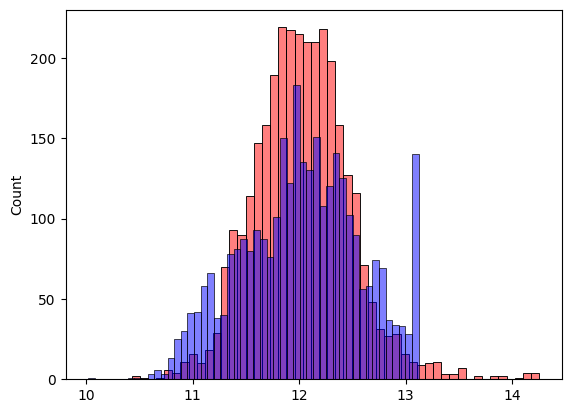

In [103]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_test, color='blue', alpha=0.5, bins=50)